In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

### Controllers errors dataset of the simulation

The controllerError.csv is a file that contains the dataset of the errors of fifteen simulation tests of the autonomous landing process of a drone on a landing platform. Three controllers were tested (P Proportional, PI Proportinal-Integral, PID Proportinal-Integral-Derivative), five times each, to determine which of them have a better performance.

In the dataset each controller was tested five times, the dataset must have four columns per test (timestamp, errors in X, Y and angle), each test is named as its controller and numerate from 1 to 5, for example *P1_error_X* makes reference to the error in X of first test of the controller P.

In [2]:
error_file = "./data/controllerError_2.csv"
data = pd.read_csv(error_file)

The _controller_times_ dictionary contains the duration time of the simulation for each landing process. The time of the tests must be saved with the name of the test (as described above) in the _controllerTestTime.csv_ file n the columns _test_ and _duration_time_.

In [3]:
controller_times = {}

with open("./data/controllerTestTime_2.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)


{'P1': 42.22, 'P2': 46.97, 'P3': 73.98, 'P4': 52.94, 'P5': 56.34, 'PI1': 45.06, 'PI2': 55.11, 'PI3': 35.96, 'PI4': 34.0, 'PI5': 35.43, 'PID1': 29.04, 'PID2': 58.41, 'PID3': 51.92, 'PID4': 42.9, 'PID5': 52.57}


In [4]:
print("Data size:", data.shape)
print("Data Columns:", data.columns)

Data size: (866, 60)
Data Columns: Index(['P1_time_percent', 'P1_error_X', 'P1_error_Y', 'P1_error_Angle',
       'P2_time_percent', 'P2_error_X', 'P2_error_Y', 'P2_error_Angle',
       'P3_time_percent', 'P3_error_X', 'P3_error_Y', 'P3_error_Angle',
       'P4_time_percent', 'P4_error_X', 'P4_error_Y', 'P4_error_Angle',
       'P5_time_percent', 'P5_error_X', 'P5_error_Y', 'P5_error_Angle',
       'PI1_time_percent', 'PI1_error_X', 'PI1_error_Y', 'PI1_error_Angle',
       'PI2_time_percent', 'PI2_error_X', 'PI2_error_Y', 'PI2_error_Angle',
       'PI3_time_percent', 'PI3_error_X', 'PI3_error_Y', 'PI3_error_Angle',
       'PI4_time_percent', 'PI4_error_X', 'PI4_error_Y', 'PI4_error_Angle',
       'PI5_time_percent', 'PI5_error_X', 'PI5_error_Y', 'PI5_error_Angle',
       'PID1_time_percent', 'PID1_error_X', 'PID1_error_Y', 'PID1_error_Angle',
       'PID2_time_percent', 'PID2_error_X', 'PID2_error_Y', 'PID2_error_Angle',
       'PID3_time_percent', 'PID3_error_X', 'PID3_error_Y', 'PID3

In [5]:
data

,P1_time_percent,P1_error_X,P1_error_Y,P1_error_Angle,P2_time_percent,P2_error_X,P2_error_Y,P2_error_Angle,P3_time_percent,P3_error_X,P3_error_Y,P3_error_Angle,P4_time_percent,P4_error_X,P4_error_Y,P4_error_Angle,P5_time_percent,P5_error_X,P5_error_Y,P5_error_Angle,PI1_time_percent,PI1_error_X,PI1_error_Y,PI1_error_Angle,PI2_time_percent,PI2_error_X,PI2_error_Y,PI2_error_Angle,PI3_time_percent,PI3_error_X,PI3_error_Y,PI3_error_Angle,PI4_time_percent,PI4_error_X,PI4_error_Y,PI4_error_Angle,PI5_time_percent,PI5_error_X,PI5_error_Y,PI5_error_Angle,PID1_time_percent,PID1_error_X,PID1_error_Y,PID1_error_Angle,PID2_time_percent,PID2_error_X,PID2_error_Y,PID2_error_Angle,PID3_time_percent,PID3_error_X,PID3_error_Y,PID3_error_Angle,PID4_time_percent,PID4_error_X,PID4_error_Y,PID4_error_Angle,PID5_time_percent,PID5_error_X,PID5_error_Y,PID5_error_Angle
0,2.839785e+12,142.719742,116.509270,-36.990025,2.791697e+12,156.662964,108.199387,-38.915462,2880469000000,157.180695,104.585068,-33.519306,2.802321e+12,131.717743,100.464310,-25.948696,2.787377e+12,144.080444,108.727936,-37.721161,2.860869e+12,148.498276,128.256958,-36.660713,2.795269e+12,146.223969,113.318985,-34.684799,2.789853e+12,148.712952,113.924347,-40.343563,2.794001e+12,150.237976,104.456406,-27.456942,2.783693e+12,156.782120,114.587898,-30.252295,2.789485e+12,182.524475,139.400970,-36.556133,2.801409e+12,143.784927,107.567856,-38.682869,2.844341e+12,165.801086,106.747253,-35.539108,2.782809e+12,160.511276,119.082245,-43.411438,2.846573e+12,180.640610,131.607727,-22.702271
1,2.839893e+12,142.800461,116.509361,-37.042511,2.791809e+12,165.827393,120.680138,-38.685604,2880553000000,157.210876,104.953369,-33.415478,2.802421e+12,133.034866,103.664093,-28.060776,2.787473e+12,143.859360,108.565430,-37.865322,2.860869e+12,148.712875,130.831390,-21.056482,2.795385e+12,154.015427,123.499619,-34.220116,2.789941e+12,147.852066,116.436157,-40.248901,2.794001e+12,150.123138,104.894073,-29.112925,2.783789e+12,156.613449,114.115303,-30.160608,2.789577e+12,185.473282,141.659073,-36.516521,2.801497e+12,150.650085,117.486473,-38.693142,2.844433e+12,166.811554,108.199692,-35.483807,2.782929e+12,160.970245,119.412483,-44.101791,2.846649e+12,183.349915,134.575684,-22.253206
2,2.839981e+12,133.373016,113.625786,-35.509178,2.791921e+12,152.898483,111.143036,-35.948112,2880661000000,157.241043,105.321671,-33.311649,2.802525e+12,132.932587,103.984344,-27.721069,2.787573e+12,136.788177,114.994041,-39.824165,2.860973e+12,149.225342,132.310776,-20.108719,2.795465e+12,154.493668,124.197456,-34.116917,2.789941e+12,147.264648,117.870308,-39.773567,2.794089e+12,150.199615,104.744247,-29.056757,2.783893e+12,158.248169,127.313919,-32.476326,2.789661e+12,188.422104,143.917175,-36.476913,2.801497e+12,153.707016,121.466408,-39.346443,2.844525e+12,160.885147,109.202103,-36.857460,2.783045e+12,161.429199,119.742729,-44.792145,2.846757e+12,149.602051,118.550064,-24.569696
3,2.840061e+12,132.659286,113.384941,-35.482990,2.791921e+12,146.633575,108.228302,-35.489548,2880781000000,180.673172,130.866821,-14.399608,2.802625e+12,154.155701,126.520149,-29.237946,2.787649e+12,136.019226,115.358696,-40.066811,2.861057e+12,132.368774,117.117935,-24.175343,2.795741e+12,154.971893,124.895302,-34.013718,2.790021e+12,143.198059,117.052643,-39.430981,2.794205e+12,147.966873,104.882919,-29.461525,2.784001e+12,158.225204,127.946091,-32.499229,2.789749e+12,197.172607,163.474792,-36.243401,2.801593e+12,136.685501,108.645401,-39.225574,2.844625e+12,161.301346,110.615982,-36.878384,2.783153e+12,161.888168,120.072968,-45.482502,2.847021e+12,149.132751,119.862015,-24.265877
4,2.840241e+12,131.945572,113.144096,-35.456806,2.792029e+12,146.355515,108.482635,-35.357693,2880881000000,191.004211,142.339462,-0.419367,2.802733e+12,155.862427,128.724915,-28.999418,2.787781e+12,135.250275,115.723351,-40.309456,2.861061e+12,129.335739,114.055969,-27.897478,2.795829e+12,155.450134,125.593140,-33.910519,2.790101e+12,151.884888,125.913033,-37.472027,2.

Calculate the time for each sample given the total time of each test and the timestamp of the simulation (time_percent in the dataset), knowing that the relationship between the duration time of the test and the timestamp is linear. It important to notice that the starting point of the duration time of the test is zero.

$\displaystyle m = \frac{time_{total}}{timestamp_n-timestamp_0}$ where $timestamp_0$ is the first value of the timestamps, $timestamp_n$ is the last value of the timestamps and $total time$ is the duration of the test.

$\displaystyle b = m.timestamp_n + time_{total}$

The linear relantionship between the timestamp ant the duration time of the tests is :
$\displaystyle time = m.timestamp + b$

In [6]:
for test, test_time in controller_times.items():    

    first_val_tstamp = data[test+"_time_percent"][0]
    last_val_tstamp = data[test+"_time_percent"][data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    data[test+"_time"] = m * data[test+"_time_percent"] + b
    
#    last_time = data[test+"_time"][data.apply(lambda column: column.dropna().index[-1])[test+"_time"]]
#    print(test, test_time, last_time)

data = data.reindex(columns=sorted(data.columns))

    
# data.apply(lambda column: column.dropna().index[-1])["P1_time_percent"] #Get last non NaN value of a column



In [7]:
data

,P1_error_Angle,P1_error_X,P1_error_Y,P1_time,P1_time_percent,P2_error_Angle,P2_error_X,P2_error_Y,P2_time,P2_time_percent,P3_error_Angle,P3_error_X,P3_error_Y,P3_time,P3_time_percent,P4_error_Angle,P4_error_X,P4_error_Y,P4_time,P4_time_percent,P5_error_Angle,P5_error_X,P5_error_Y,P5_time,P5_time_percent,PI1_error_Angle,PI1_error_X,PI1_error_Y,PI1_time,PI1_time_percent,PI2_error_Angle,PI2_error_X,PI2_error_Y,PI2_time,PI2_time_percent,PI3_error_Angle,PI3_error_X,PI3_error_Y,PI3_time,PI3_time_percent,PI4_error_Angle,PI4_error_X,PI4_error_Y,PI4_time,PI4_time_percent,PI5_error_Angle,PI5_error_X,PI5_error_Y,PI5_time,PI5_time_percent,PID1_error_Angle,PID1_error_X,PID1_error_Y,PID1_time,PID1_time_percent,PID2_error_Angle,PID2_error_X,PID2_error_Y,PID2_time,PID2_time_percent,PID3_error_Angle,PID3_error_X,PID3_error_Y,PID3_time,PID3_time_percent,PID4_error_Angle,PID4_error_X,PID4_error_Y,PID4_time,PID4_time_percent,PID5_error_Angle,PID5_error_X,PID5_error_Y,PID5_time,PID5_time_percent
0,-36.990025,142.719742,116.509270,0.000000,2.839785e+12,-38.915462,156.662964,108.199387,-4.547474e-13,2.791697e+12,-33.519306,157.180695,104.585068,0.000000,2880469000000,-25.948696,131.717743,100.464310,0.000000,2.802321e+12,-37.721161,144.080444,108.727936,0.000000,2.787377e+12,-36.660713,148.498276,128.256958,-4.547474e-13,2.860869e+12,-34.684799,146.223969,113.318985,4.547474e-13,2.795269e+12,-40.343563,148.712952,113.924347,0.000000,2.789853e+12,-27.456942,150.237976,104.456406,0.000000,2.794001e+12,-30.252295,156.782120,114.587898,0.000000,2.783693e+12,-36.556133,182.524475,139.400970,0.000000,2.789485e+12,-38.682869,143.784927,107.567856,0.000000,2.801409e+12,-35.539108,165.801086,106.747253,0.000000,2.844341e+12,-43.411438,160.511276,119.082245,4.547474e-13,2.782809e+12,-22.702271,180.640610,131.607727,0.000000,2.846573e+12
1,-37.042511,142.800461,116.509361,0.112843,2.839893e+12,-38.685604,165.827393,120.680138,1.171217e-01,2.791809e+12,-33.415478,157.210876,104.953369,0.085966,2880553000000,-28.060776,133.034866,103.664093,0.103149,2.802421e+12,-37.865322,143.859360,108.565430,0.099234,2.787473e+12,-21.056482,148.712875,130.831390,-4.547474e-13,2.860869e+12,-34.220116,154.015427,123.499619,1.207913e-01,2.795385e+12,-40.248901,147.852066,116.436157,0.092151,2.789941e+12,-29.112925,150.123138,104.894073,0.000000,2.794001e+12,-30.160608,156.613449,114.115303,0.103019,2.783789e+12,-36.516521,185.473282,141.659073,0.103042,2.789577e+12,-38.693142,150.650085,117.486473,0.089705,2.801497e+12,-35.483807,166.811554,108.199692,0.095046,2.844433e+12,-44.101791,160.970245,119.412483,1.276153e-01,2.782929e+12,-22.253206,183.349915,134.575684,0.078315,2.846649e+12
2,-35.509178,133.373016,113.625786,0.204789,2.839981e+12,-35.948112,152.898483,111.143036,2.342435e-01,2.791921e+12,-33.311649,157.241043,105.321671,0.196494,2880661000000,-27.721069,132.932587,103.984344,0.210423,2.802525e+12,-39.824165,136.788177,114.994041,0.202602,2.787573e+12,-20.108719,149.225342,132.310776,1.106812e-01,2.860973e+12,-34.116917,154.493668,124.197456,2.040957e-01,2.795465e+12,-39.773567,147.264648,117.870308,0.092151,2.789941e+12,-29.056757,150.199615,104.744247,0.093093,2.794089e+12,-32.476326,158.248169,127.313919,0.214623,2.783893e+12,-36.476913,188.422104,143.917175,0.197124,2.789661e+12,-39.346443,153.707016,121.466408,0.089705,2.801497e+12,-36.857460,160.885147,109.202103,0.190092,2.844525e+12,-44.792145,161.429199,119.742729,2.509767e-01,2.783045e+12,-24.569696,149.602051,118.550064,0.189605,2.846757e+12
3,-35.482990,132.659286,113.384941,0.288377,2.840061e+12,-35.489548,146.633575,108.228302,2.342435e-01,2.791921e+12,-14.399608,180.673172,130.866821,0.319303,2880781000000,-29.237946,154.155701,126.520149,0.313572,2.802625e+12,-40.066811,136.019226,115.358696,0.281162,2.787649e+12,-24.175343,132.368774,117.117935,2.000775e-01,2.861057e+12,-34.013718,154.971893,124.895302,4.914957e-01,2.795741e+12,-39.430981,143.198059,117.052643,0.175925,2.790021e+12,-29.461525,147.9668

## Plotting the controllers errors
The five results obtained for each controller will be graphed to see the behaviour of the controllers.

### Organizing the data to plot the controllers

In [8]:
controllers = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])
    row_num = data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = data[test+"_time"][0:row_num+1]
    control["Error_X"] = data[test+"_error_X"][0:row_num+1]
    control["Error_Y"] = data[test+"_error_Y"][0:row_num+1]
    control["Error_Angle"] = data[test+"_error_Angle"][0:row_num+1]
    control["Controller"] = test
    
    controllers = controllers.append(control, ignore_index = True)

    del control

controllers

,Time,Controller,Error_X,Error_Y,Error_Angle
0,0.000000,P1,142.719742,116.509270,-36.990025
1,0.112843,P1,142.800461,116.509361,-37.042511
2,0.204789,P1,133.373016,113.625786,-35.509178
3,0.288377,P1,132.659286,113.384941,-35.482990
4,0.476448,P1,131.945572,113.144096,-35.456806
...,...,...,...,...,...
8279,52.409248,PID5,2.792999,-1.205154,0.055305
8280,52.409248,PID5,3.839294,-0.481552,1.929891
8281,52.413370,PID5,-1.106293,-0.066269,1.649763
8282,52.549391,PID5,3.531128,-1.380905,1.489820


### Error graphs for controller P
Create a subset with the five tests of the P (proportional) controller to decide which of the test performed better.

In [9]:
controller_P = controllers[
    (controllers.Controller == "P1") |
    (controllers.Controller == "P2") |
    (controllers.Controller == "P3") |
    (controllers.Controller == "P4") |
    (controllers.Controller == "P5")
].copy()
controller_P

,Time,Controller,Error_X,Error_Y,Error_Angle
0,0.000000,P1,142.719742,116.509270,-36.990025
1,0.112843,P1,142.800461,116.509361,-37.042511
2,0.204789,P1,133.373016,113.625786,-35.509178
3,0.288377,P1,132.659286,113.384941,-35.482990
4,0.476448,P1,131.945572,113.144096,-35.456806
...,...,...,...,...,...
3296,55.839696,P5,2.076630,6.953415,-0.131336
3297,55.955469,P5,1.582489,7.718597,-0.072013
3298,56.071242,P5,1.305084,7.699341,-0.086043
3299,56.199419,P5,0.854736,7.274048,-0.038025


Text(0.5, 0.98, 'P Controller Errors')

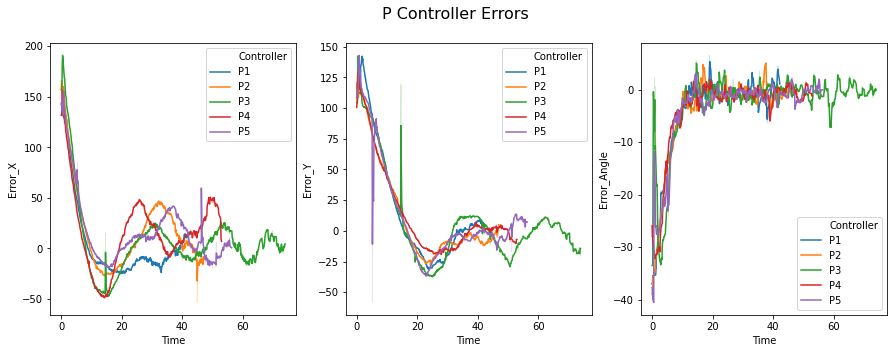

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_P, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])
sns.lineplot(data=controller_P, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])
sns.lineplot(data=controller_P, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('P Controller Errors', fontsize=16)

### Error graphs for controller PI

In [11]:
controller_PI = controllers[
    (controllers.Controller == "PI1") |
    (controllers.Controller == "PI2") |
    (controllers.Controller == "PI3") |
    (controllers.Controller == "PI4") |
    (controllers.Controller == "PI5")
].copy()
controller_PI

,Time,Controller,Error_X,Error_Y,Error_Angle
3301,-4.547474e-13,PI1,148.498276,128.256958,-36.660713
3302,-4.547474e-13,PI1,148.712875,130.831390,-21.056482
3303,1.106812e-01,PI1,149.225342,132.310776,-20.108719
3304,2.000775e-01,PI1,132.368774,117.117935,-24.175343
3305,2.043344e-01,PI1,129.335739,114.055969,-27.897478
...,...,...,...,...,...
5732,3.491920e+01,PI5,-8.186798,-2.288910,-1.661454
5733,3.505226e+01,PI5,-10.515472,-1.769012,-1.646683
5734,3.517245e+01,PI5,-2.430481,0.730301,-3.505382
5735,3.531840e+01,PI5,-0.802551,0.491867,-2.141308


Text(0.5, 0.98, 'PI Controller Errors')

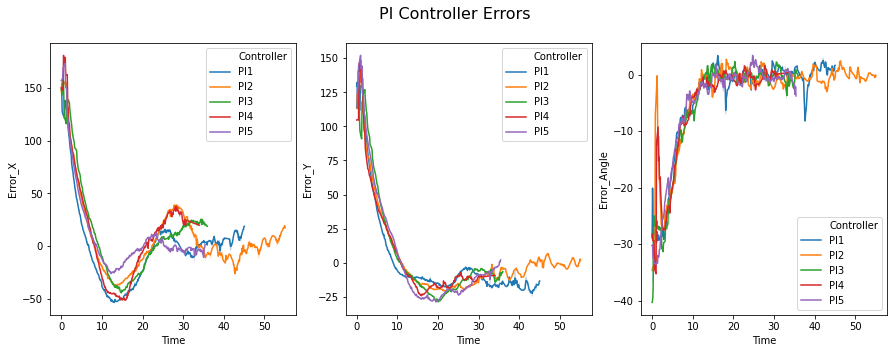

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_PI, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])

sns.lineplot(data=controller_PI, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])

sns.lineplot(data=controller_PI, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('PI Controller Errors', fontsize=16)

### Error graphs for controller PID

In [13]:
controller_PID = controllers[
    (controllers.Controller == "PID1") |
    (controllers.Controller == "PID2") |
    (controllers.Controller == "PID3") |
    (controllers.Controller == "PID4") |
    (controllers.Controller == "PID5")
].copy()
controller_PID

,Time,Controller,Error_X,Error_Y,Error_Angle
5737,0.000000,PID1,182.524475,139.400970,-36.556133
5738,0.103042,PID1,185.473282,141.659073,-36.516521
5739,0.197124,PID1,188.422104,143.917175,-36.476913
5740,0.295687,PID1,197.172607,163.474792,-36.243401
5741,0.407689,PID1,200.600891,167.162582,-36.193565
...,...,...,...,...,...
8279,52.409248,PID5,2.792999,-1.205154,0.055305
8280,52.409248,PID5,3.839294,-0.481552,1.929891
8281,52.413370,PID5,-1.106293,-0.066269,1.649763
8282,52.549391,PID5,3.531128,-1.380905,1.489820


Text(0.5, 0.98, 'PID Controller Errors')

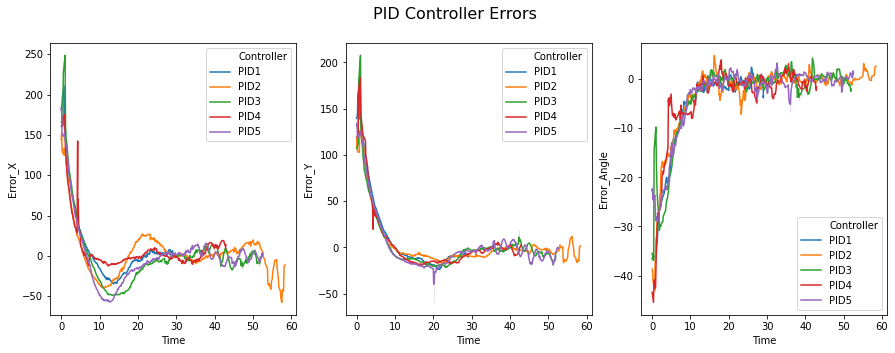

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.lineplot(data=controller_PID, x="Time", y="Error_X",
             hue="Controller", ax=ax[0])

sns.lineplot(data=controller_PID, x="Time", y="Error_Y",
             hue="Controller", ax=ax[1])

sns.lineplot(data=controller_PID, x="Time", y="Error_Angle",
             hue="Controller", ax=ax[2])

fig.suptitle('PID Controller Errors', fontsize=16)

## Test: mean of the controllers P, PI and PID
Obtain the mean of each controller given their five tests and plot the results.
As each tests have different durations, complete the NaN values of the errors with the last value of the test to obtain the mean. The longer duration time will be used to plot the errors.

To determine which of the controllers is better the mean of the errors for each controller will be plotted to decide which of them has the best performance for the landing process.

In [15]:
test_df = data.loc[:, "P1_error_Angle":"PID5_time_percent"].copy()

droplist = [i for i in test_df.columns if 'time_percent' in i]
test_df.drop(droplist, axis=1, inplace=True)

timedict = {i: 2 for i in test_df.columns if 'time' in i}
test_df = test_df.round(timedict)
test_df

,P1_error_Angle,P1_error_X,P1_error_Y,P1_time,P2_error_Angle,P2_error_X,P2_error_Y,P2_time,P3_error_Angle,P3_error_X,P3_error_Y,P3_time,P4_error_Angle,P4_error_X,P4_error_Y,P4_time,P5_error_Angle,P5_error_X,P5_error_Y,P5_time,PI1_error_Angle,PI1_error_X,PI1_error_Y,PI1_time,PI2_error_Angle,PI2_error_X,PI2_error_Y,PI2_time,PI3_error_Angle,PI3_error_X,PI3_error_Y,PI3_time,PI4_error_Angle,PI4_error_X,PI4_error_Y,PI4_time,PI5_error_Angle,PI5_error_X,PI5_error_Y,PI5_time,PID1_error_Angle,PID1_error_X,PID1_error_Y,PID1_time,PID2_error_Angle,PID2_error_X,PID2_error_Y,PID2_time,PID3_error_Angle,PID3_error_X,PID3_error_Y,PID3_time,PID4_error_Angle,PID4_error_X,PID4_error_Y,PID4_time,PID5_error_Angle,PID5_error_X,PID5_error_Y,PID5_time
0,-36.990025,142.719742,116.509270,0.00,-38.915462,156.662964,108.199387,-0.00,-33.519306,157.180695,104.585068,0.00,-25.948696,131.717743,100.464310,0.00,-37.721161,144.080444,108.727936,0.00,-36.660713,148.498276,128.256958,-0.00,-34.684799,146.223969,113.318985,0.00,-40.343563,148.712952,113.924347,0.00,-27.456942,150.237976,104.456406,0.00,-30.252295,156.782120,114.587898,0.00,-36.556133,182.524475,139.400970,0.00,-38.682869,143.784927,107.567856,0.00,-35.539108,165.801086,106.747253,0.00,-43.411438,160.511276,119.082245,0.00,-22.702271,180.640610,131.607727,0.00
1,-37.042511,142.800461,116.509361,0.11,-38.685604,165.827393,120.680138,0.12,-33.415478,157.210876,104.953369,0.09,-28.060776,133.034866,103.664093,0.10,-37.865322,143.859360,108.565430,0.10,-21.056482,148.712875,130.831390,-0.00,-34.220116,154.015427,123.499619,0.12,-40.248901,147.852066,116.436157,0.09,-29.112925,150.123138,104.894073,0.00,-30.160608,156.613449,114.115303,0.10,-36.516521,185.473282,141.659073,0.10,-38.693142,150.650085,117.486473,0.09,-35.483807,166.811554,108.199692,0.10,-44.101791,160.970245,119.412483,0.13,-22.253206,183.349915,134.575684,0.08
2,-35.509178,133.373016,113.625786,0.20,-35.948112,152.898483,111.143036,0.23,-33.311649,157.241043,105.321671,0.20,-27.721069,132.932587,103.984344,0.21,-39.824165,136.788177,114.994041,0.20,-20.108719,149.225342,132.310776,0.11,-34.116917,154.493668,124.197456,0.20,-39.773567,147.264648,117.870308,0.09,-29.056757,150.199615,104.744247,0.09,-32.476326,158.248169,127.313919,0.21,-36.476913,188.422104,143.917175,0.20,-39.346443,153.707016,121.466408,0.09,-36.857460,160.885147,109.202103,0.19,-44.792145,161.429199,119.742729,0.25,-24.569696,149.602051,118.550064,0.19
3,-35.482990,132.659286,113.384941,0.29,-35.489548,146.633575,108.228302,0.23,-14.399608,180.673172,130.866821,0.32,-29.237946,154.155701,126.520149,0.31,-40.066811,136.019226,115.358696,0.28,-24.175343,132.368774,117.117935,0.20,-34.013718,154.971893,124.895302,0.49,-39.430981,143.198059,117.052643,0.18,-29.461525,147.966873,104.882919,0.22,-32.499229,158.225204,127.946091,0.33,-36.243401,197.172607,163.474792,0.30,-39.225574,136.685501,108.645401,0.19,-36.878384,161.301346,110.615982,0.29,-45.482502,161.888168,120.072968,0.37,-24.265877,149.132751,119.862015,0.46
4,-35.456806,131.945572,113.144096,0.48,-35.357693,146.355515,108.482635,0.35,-0.419367,191.004211,142.339462,0.42,-28.999418,155.862427,128.724915,0.42,-40.309456,135.250275,115.723351,0.42,-27.897478,129.335739,114.055969,0.20,-33.910519,155.450134,125.593140,0.58,-37.472027,151.884888,125.913033,0.26,-29.428478,147.842270,104.758209,0.34,-33.351761,169.394073,144.284729,0.46,-36.193565,200.600891,167.162582,0.41,-41.076992,129.568375,103.264313,0.19,-36.899303,161.717545,112.029877,0.40,-40.878849,170.851074,167.894348,0.48,-23.962057,148.663467,121.173973,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118155,-0.786133,-20.152161,73.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [16]:
time_columns = [i for i in test_df.columns if 'time' in i]
column_pos = test_df[time_columns].apply(lambda column: column.dropna().index[-1])

time_last_row = dict(zip(time_columns, column_pos))
print(time_last_row)

{'P1_time': 566, 'P2_time': 559, 'P3_time': 865, 'P4_time': 604, 'P5_time': 702, 'PI1_time': 548, 'PI2_time': 639, 'PI3_time': 445, 'PI4_time': 403, 'PI5_time': 396, 'PID1_time': 329, 'PID2_time': 645, 'PID3_time': 518, 'PID4_time': 462, 'PID5_time': 588}


Slice _test_df_ in three dataframes P, PI and PID. For each dataframe copy all related data to the controller, from the first row, to the last value of the longer controller:

 * For the P controller: from row 0 to row 865 (the longest duration test was P3).
 * For the PI controller: from row 0 to row 639 (the longest duration test was PI2).
 * For the PID controller: from row 0 to row 645 (the longest duration test was PID2).

In [17]:
p_df = test_df.loc[:866, "P1_error_Angle":"P5_time"].copy()
pi_df = test_df.loc[:639, "PI1_error_Angle":"PI5_time"].copy()
pid_df = test_df.loc[:645, "PID1_error_Angle":"PID5_time"].copy()

Complete the columns (excluding the times) by replacing the NaN values with the last value of the test, for the three controller dataframes.

In [18]:
add_last_list = [i for i in p_df.columns if 'time' not in i]
for col in add_last_list:
    last_value = p_df[col][data.apply(lambda column: column.dropna().index[-1])[col]]
    p_df[col] = p_df[col].replace(np.nan, last_value)
p_df

,P1_error_Angle,P1_error_X,P1_error_Y,P1_time,P2_error_Angle,P2_error_X,P2_error_Y,P2_time,P3_error_Angle,P3_error_X,P3_error_Y,P3_time,P4_error_Angle,P4_error_X,P4_error_Y,P4_time,P5_error_Angle,P5_error_X,P5_error_Y,P5_time
0,-36.990025,142.719742,116.509270,0.00,-38.915462,156.662964,108.199387,-0.00,-33.519306,157.180695,104.585068,0.00,-25.948696,131.717743,100.464310,0.00,-37.721161,144.080444,108.727936,0.00
1,-37.042511,142.800461,116.509361,0.11,-38.685604,165.827393,120.680138,0.12,-33.415478,157.210876,104.953369,0.09,-28.060776,133.034866,103.664093,0.10,-37.865322,143.859360,108.565430,0.10
2,-35.509178,133.373016,113.625786,0.20,-35.948112,152.898483,111.143036,0.23,-33.311649,157.241043,105.321671,0.20,-27.721069,132.932587,103.984344,0.21,-39.824165,136.788177,114.994041,0.20
3,-35.482990,132.659286,113.384941,0.29,-35.489548,146.633575,108.228302,0.23,-14.399608,180.673172,130.866821,0.32,-29.237946,154.155701,126.520149,0.31,-40.066811,136.019226,115.358696,0.28
4,-35.456806,131.945572,113.144096,0.48,-35.357693,146.355515,108.482635,0.35,-0.419367,191.004211,142.339462,0.42,-28.999418,155.862427,128.724915,0.42,-40.309456,135.250275,115.723351,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1.074809,15.994263,3.666245,NaN,0.219331,-14.319733,5.046982,NaN,0.118155,-0.786133,-20.152161,73.69,-1.238623,7.029022,-6.950684,NaN,-0.048505,0.562286,7.219482,NaN
862,1.074809,15.994263,3.666245,NaN,0.219331,-14.319733,5.046982,NaN,-0.131867,2.776947,-17.156281,73.69,-1.238623,7.029022,-6.950684,NaN,-0.048505,0.562286,7.219482,NaN
863,1.074809,15.994263,3.666245,NaN,0.219331,-14.319733,5.046982,NaN,-0.286510,1.858521,-16.486328,73.84,-1.238623,7.029022,-6.950684,NaN,-0.048505,0.562286,7.219482,NaN
864,1.074809,15.994263,3.666245,NaN,0.219331,-14.319733,5.046982,NaN,0.191552,4.076111,-13.972305,73.84,-1.238623,7.029022,-6.950684,NaN,-0.048505,0.562286,7.219482,NaN


In [19]:
add_last_list = [i for i in pi_df.columns if 'time' not in i]
for col in add_last_list:
    last_value = pi_df[col][data.apply(lambda column: column.dropna().index[-1])[col]]
    pi_df[col] = pi_df[col].replace(np.nan, last_value)
pi_df

,PI1_error_Angle,PI1_error_X,PI1_error_Y,PI1_time,PI2_error_Angle,PI2_error_X,PI2_error_Y,PI2_time,PI3_error_Angle,PI3_error_X,PI3_error_Y,PI3_time,PI4_error_Angle,PI4_error_X,PI4_error_Y,PI4_time,PI5_error_Angle,PI5_error_X,PI5_error_Y,PI5_time
0,-36.660713,148.498276,128.256958,-0.00,-34.684799,146.223969,113.318985,0.00,-40.343563,148.712952,113.924347,0.00,-27.456942,150.237976,104.456406,0.00,-30.252295,156.782120,114.587898,0.00
1,-21.056482,148.712875,130.831390,-0.00,-34.220116,154.015427,123.499619,0.12,-40.248901,147.852066,116.436157,0.09,-29.112925,150.123138,104.894073,0.00,-30.160608,156.613449,114.115303,0.10
2,-20.108719,149.225342,132.310776,0.11,-34.116917,154.493668,124.197456,0.20,-39.773567,147.264648,117.870308,0.09,-29.056757,150.199615,104.744247,0.09,-32.476326,158.248169,127.313919,0.21
3,-24.175343,132.368774,117.117935,0.20,-34.013718,154.971893,124.895302,0.49,-39.430981,143.198059,117.052643,0.18,-29.461525,147.966873,104.882919,0.22,-32.499229,158.225204,127.946091,0.33
4,-27.897478,129.335739,114.055969,0.20,-33.910519,155.450134,125.593140,0.58,-37.472027,151.884888,125.913033,0.26,-29.428478,147.842270,104.758209,0.34,-33.351761,169.394073,144.284729,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.617254,18.800415,-13.449112,NaN,-0.394866,17.024292,-0.039368,54.75,-0.237565,18.836212,-6.537445,NaN,0.365654,19.864563,-9.257156,NaN,-3.793279,1.634033,2.021378,NaN
636,1.617254,18.800415,-13.449112,NaN,-0.543324,16.935516,0.022232,54.87,-0.237565,18.836212,-6.537445,NaN,0.365654,19.864563,-9.257156,NaN,-3.793279,1.634033,2.021378,NaN
637,1.617254,18.800415,-13.449112,NaN,-0.560598,18.683838,1.690994,54.87,-0.237565,18.836212,-6.537445,NaN,0.365654,19.864563,-9.257156,NaN,-3.793279,1.634033,2.021378,NaN
638,1.617254,18.800415,-13.449112,NaN,-0.076997,19.397705,2.680603,55.01,-0.237565,18.836212,-6.537445,NaN,0.365654,19.864563,-9.257156,NaN,-3.793279,1.634033,2.021378,NaN


In [20]:
add_last_list = [i for i in pid_df.columns if 'time' not in i]
for col in add_last_list:
    last_value = pid_df[col][data.apply(lambda column: column.dropna().index[-1])[col]]
    pid_df[col] = pid_df[col].replace(np.nan, last_value)
pid_df

,PID1_error_Angle,PID1_error_X,PID1_error_Y,PID1_time,PID2_error_Angle,PID2_error_X,PID2_error_Y,PID2_time,PID3_error_Angle,PID3_error_X,PID3_error_Y,PID3_time,PID4_error_Angle,PID4_error_X,PID4_error_Y,PID4_time,PID5_error_Angle,PID5_error_X,PID5_error_Y,PID5_time
0,-36.556133,182.524475,139.400970,0.00,-38.682869,143.784927,107.567856,0.00,-35.539108,165.801086,106.747253,0.00,-43.411438,160.511276,119.082245,0.00,-22.702271,180.640610,131.607727,0.00
1,-36.516521,185.473282,141.659073,0.10,-38.693142,150.650085,117.486473,0.09,-35.483807,166.811554,108.199692,0.10,-44.101791,160.970245,119.412483,0.13,-22.253206,183.349915,134.575684,0.08
2,-36.476913,188.422104,143.917175,0.20,-39.346443,153.707016,121.466408,0.09,-36.857460,160.885147,109.202103,0.19,-44.792145,161.429199,119.742729,0.25,-24.569696,149.602051,118.550064,0.19
3,-36.243401,197.172607,163.474792,0.30,-39.225574,136.685501,108.645401,0.19,-36.878384,161.301346,110.615982,0.29,-45.482502,161.888168,120.072968,0.37,-24.265877,149.132751,119.862015,0.46
4,-36.193565,200.600891,167.162582,0.41,-41.076992,129.568375,103.264313,0.19,-36.899303,161.717545,112.029877,0.40,-40.878849,170.851074,167.894348,0.48,-23.962057,148.663467,121.173973,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,-3.395998,2.067230,-8.278809,NaN,0.738188,-41.747314,-13.686646,57.69,-2.052889,-1.524353,-8.722702,NaN,-1.595187,7.723694,2.430969,NaN,1.164305,0.895660,-1.150482,NaN
642,-3.395998,2.067230,-8.278809,NaN,0.752156,-42.735840,-14.282303,57.83,-2.052889,-1.524353,-8.722702,NaN,-1.595187,7.723694,2.430969,NaN,1.164305,0.895660,-1.150482,NaN
643,-3.395998,2.067230,-8.278809,NaN,0.766124,-43.724396,-14.877975,58.01,-2.052889,-1.524353,-8.722702,NaN,-1.595187,7.723694,2.430969,NaN,1.164305,0.895660,-1.150482,NaN
644,-3.395998,2.067230,-8.278809,NaN,2.496158,-12.764984,0.683975,58.15,-2.052889,-1.524353,-8.722702,NaN,-1.595187,7.723694,2.430969,NaN,1.164305,0.895660,-1.150482,NaN


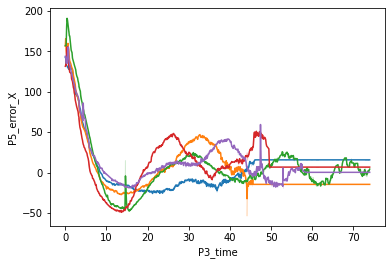

In [21]:
sns.lineplot(data=p_df, x="P3_time", y="P1_error_X")
sns.lineplot(data=p_df, x="P3_time", y="P2_error_X")
sns.lineplot(data=p_df, x="P3_time", y="P3_error_X")
sns.lineplot(data=p_df, x="P3_time", y="P4_error_X")
sns.lineplot(data=p_df, x="P3_time", y="P5_error_X")

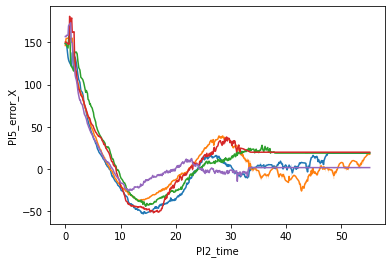

In [22]:
sns.lineplot(data=pi_df, x="PI2_time", y="PI1_error_X")
sns.lineplot(data=pi_df, x="PI2_time", y="PI2_error_X")
sns.lineplot(data=pi_df, x="PI2_time", y="PI3_error_X")
sns.lineplot(data=pi_df, x="PI2_time", y="PI4_error_X")
sns.lineplot(data=pi_df, x="PI2_time", y="PI5_error_X")

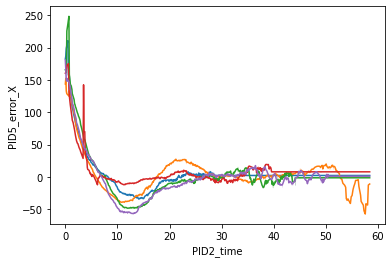

In [23]:
sns.lineplot(data=pid_df, x="PID2_time", y="PID1_error_X")
sns.lineplot(data=pid_df, x="PID2_time", y="PID2_error_X")
sns.lineplot(data=pid_df, x="PID2_time", y="PID3_error_X")
sns.lineplot(data=pid_df, x="PID2_time", y="PID4_error_X")
sns.lineplot(data=pid_df, x="PID2_time", y="PID5_error_X")

Create a new dataframe with the data of the longest time (for each controller) and the mean of each error for the controllers for the three errors (X, Y and angle).

In [24]:
mean_df = pd.DataFrame(columns=["Time", "Controller", "Error_X", "Error_Y", "Error_Angle"])

p_mean_df = pd.DataFrame()
p_mean_df["Time"] = p_df["P3_time"]
p_mean_df["Error_X"] = p_df.loc[:, ["P1_error_X", "P2_error_X", "P3_error_X", "P4_error_X", "P5_error_X"]].mean(axis=1)
p_mean_df["Error_Y"] = p_df.loc[:, ["P1_error_Y", "P2_error_Y", "P3_error_Y", "P4_error_Y", "P5_error_Y"]].mean(axis=1)
p_mean_df["Error_Angle"] = p_df.loc[:, ["P1_error_Angle", "P2_error_Angle", "P3_error_Angle", "P4_error_Angle", "P5_error_Angle"]].mean(axis=1)
p_mean_df["Controller"] = "P"

mean_df = mean_df.append(p_mean_df, ignore_index=True)

pi_mean_df = pd.DataFrame()
pi_mean_df["Time"] = pi_df["PI2_time"]
pi_mean_df["Error_X"] = pi_df.loc[:, ["PI1_error_X", "PI2_error_X", "PI3_error_X", "PI4_error_X", "PI5_error_X"]].mean(axis=1)
pi_mean_df["Error_Y"] = pi_df.loc[:, ["PI1_error_Y", "PI2_error_Y", "PI3_error_Y", "PI4_error_Y", "PI5_error_Y"]].mean(axis=1)
pi_mean_df["Error_Angle"] = pi_df.loc[:, ["PI1_error_Angle", "PI2_error_Angle", "PI3_error_Angle", "PI4_error_Angle", "PI5_error_Angle"]].mean(axis=1)
pi_mean_df["Controller"] = "PI"

mean_df = mean_df.append(pi_mean_df, ignore_index=True)

pid_mean_df = pd.DataFrame()
pid_mean_df["Time"] = pid_df["PID2_time"]
pid_mean_df["Error_X"] = pid_df.loc[:, ["PID1_error_X", "PID2_error_X", "PID3_error_X", "PID4_error_X", "PID5_error_X"]].mean(axis=1)
pid_mean_df["Error_Y"] = pid_df.loc[:, ["PID1_error_Y", "PID2_error_Y", "PID3_error_Y", "PID4_error_Y", "PID5_error_Y"]].mean(axis=1)
pid_mean_df["Error_Angle"] = pid_df.loc[:, ["PID1_error_Angle", "PID2_error_Angle", "PID3_error_Angle", "PID4_error_Angle", "PID5_error_Angle"]].mean(axis=1)
pid_mean_df["Controller"] = "PID"

mean_df = mean_df.append(pid_mean_df, ignore_index=True)

mean_df

,Time,Controller,Error_X,Error_Y,Error_Angle
0,0.00,P,146.472318,107.697194,-34.618930
1,0.09,P,148.546591,110.874478,-35.013938
2,0.20,P,142.646661,109.813776,-34.462835
3,0.32,P,150.028192,118.871782,-30.935380
4,0.42,P,152.083600,121.682892,-28.108548
...,...,...,...,...,...
2147,57.69,PID,-6.517017,-5.881534,-1.028316
2148,57.83,PID,-6.714722,-6.000665,-1.025523
2149,58.01,PID,-6.912433,-6.119800,-1.022729
2150,58.15,PID,-0.720551,-3.007410,-0.676722


Text(0.5, 0.98, 'Average Controller Errors')

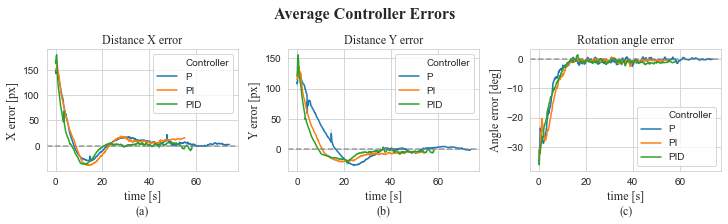

In [25]:
timesfont = {'fontname':'Times New Roman'}

sns.set_style('whitegrid')

fig = plt.figure(constrained_layout=True, figsize=(10,3))

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

x = sns.lineplot(data=mean_df, x="Time", y="Error_X",
             hue="Controller", ax=ax1)
y = sns.lineplot(data=mean_df, x="Time", y="Error_Y",
             hue="Controller", ax=ax2)
angle = sns.lineplot(data=mean_df, x="Time", y="Error_Angle",
             hue="Controller", ax=ax3)

x.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
y.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
angle.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)


x.set_title("Distance X error", fontsize=12, **timesfont)
y.set_title("Distance Y error", fontsize=12, **timesfont)
angle.set_title("Rotation angle error", fontsize=12, **timesfont)

x.set_xlabel("time [s]\n(a)", fontsize=12, **timesfont)
y.set_xlabel("time [s]\n(b)", fontsize=12, **timesfont)
angle.set_xlabel("time [s]\n(c)", fontsize=12, **timesfont)

x.set_ylabel("X error [px]", fontsize=12, **timesfont)
y.set_ylabel("Y error [px]", fontsize=12, **timesfont)
angle.set_ylabel("Angle error [deg]", fontsize=12, **timesfont)


fig.suptitle('Average Controller Errors', fontsize=16, fontweight='bold', **timesfont)

The graph of the mean error of the controllers does not show to much difference between them, so the best controller can not be chosen visually. It has been decided to calculate the MSE of the errors to choose the best controller (being the predicted value zero as it is expected that the error of the controller must be zero).

In [26]:
estimators = pd.DataFrame(columns=["std_X", "MSE_X", "RMSE_X",
                                  "std_Y", "MSE_Y", "RMSE_Y",
                                  "std_angle", "MSE_angle", "RMSE_angle"],
                          index=["P", "PI", "PID"])

estimators["MSE_X"]["P"] = (p_mean_df["Error_X"] ** 2).mean()
estimators["MSE_Y"]["P"] = (p_mean_df["Error_Y"] ** 2).mean()
estimators["MSE_angle"]["P"] = (p_mean_df["Error_Angle"] ** 2).mean()

estimators["MSE_X"]["PI"] = (pi_mean_df["Error_X"] ** 2).mean()
estimators["MSE_Y"]["PI"] = (pi_mean_df["Error_Y"] ** 2).mean()
estimators["MSE_angle"]["PI"] = (pi_mean_df["Error_Angle"] ** 2).mean()

estimators["MSE_X"]["PID"] = (pid_mean_df["Error_X"] ** 2).mean()
estimators["MSE_Y"]["PID"] = (pid_mean_df["Error_Y"] ** 2).mean()
estimators["MSE_angle"]["PID"] = (pid_mean_df["Error_Angle"] ** 2).mean()

estimators["std_X"]["P"] = (p_mean_df["Error_X"]).std()
estimators["std_Y"]["P"] = (p_mean_df["Error_Y"]).std()
estimators["std_angle"]["P"] = (p_mean_df["Error_Angle"]).std()

estimators["std_X"]["PI"] = (pi_mean_df["Error_X"]).std()
estimators["std_Y"]["PI"] = (pi_mean_df["Error_Y"]).std()
estimators["std_angle"]["PI"] = (pi_mean_df["Error_Angle"]).std()

estimators["std_X"]["PID"] = (pid_mean_df["Error_X"]).std()
estimators["std_Y"]["PID"] = (pid_mean_df["Error_Y"]).std()
estimators["std_angle"]["PID"] = (pid_mean_df["Error_Angle"]).std()

estimators[["RMSE_X", "RMSE_Y", "RMSE_angle"]] = estimators[["MSE_X", "MSE_Y", "MSE_angle"]] ** 0.5

estimators

,std_X,MSE_X,RMSE_X,std_Y,MSE_Y,RMSE_Y,std_angle,MSE_angle,RMSE_angle
P,28.9982,922.49,30.3725,32.931,1157.7,34.025,6.19458,44.9207,6.70229
PI,33.8404,1226.15,35.0164,30.5289,931.46,30.5198,7.16277,63.8706,7.99191
PID,31.6203,1014.94,31.8581,29.0283,844.396,29.0585,6.90047,59.842,7.73576


In [27]:
def highlight_min(s):
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

estimators.style.apply(highlight_min)

,std_X,MSE_X,RMSE_X,std_Y,MSE_Y,RMSE_Y,std_angle,MSE_angle,RMSE_angle
P,28.998245,922.489967,30.372520,32.930994,1157.701710,34.025016,6.194585,44.920692,6.702290
PI,33.840411,1226.149458,35.016417,30.528885,931.460117,30.519832,7.162770,63.870644,7.991911
PID,31.620347,1014.938037,31.858092,29.028281,844.396292,29.058498,6.900469,59.841995,7.735761


In [28]:
del estimators